In [6]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

In [7]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 476kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.42MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.84MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [8]:
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True,
)

In [9]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [11]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [15]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [17]:
train_data.targets.size()

torch.Size([60000])

In [18]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [19]:
from torch.utils.data import DataLoader
loaders = {
    'train' : DataLoader(train_data, batch_size=100, shuffle=True),
    'test'  : DataLoader(test_data, batch_size=100, shuffle=True),
}

In [20]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x)

In [26]:
model = CNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
          print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100. * batch_idx / len(loaders['train']):.0f}%)]\t{loss.item():.6f}")



In [27]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loaders['test']:
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.data.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'===========================\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%)')

In [28]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-20-13525cbb4de0>:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.302990
Train Epoch: 1 [2000/60000 (3%)]	2.285168
Train Epoch: 1 [4000/60000 (7%)]	2.128618
Train Epoch: 1 [6000/60000 (10%)]	1.909455
Train Epoch: 1 [8000/60000 (13%)]	1.844955
Train Epoch: 1 [10000/60000 (17%)]	1.739735
Train Epoch: 1 [12000/60000 (20%)]	1.768879
Train Epoch: 1 [14000/60000 (23%)]	1.772602
Train Epoch: 1 [16000/60000 (27%)]	1.727477
Train Epoch: 1 [18000/60000 (30%)]	1.718371
Train Epoch: 1 [20000/60000 (33%)]	1.708410
Train Epoch: 1 [22000/60000 (37%)]	1.715989
Train Epoch: 1 [24000/60000 (40%)]	1.681178
Train Epoch: 1 [26000/60000 (43%)]	1.708002
Train Epoch: 1 [28000/60000 (47%)]	1.690126
Train Epoch: 1 [30000/60000 (50%)]	1.679939
Train Epoch: 1 [32000/60000 (53%)]	1.592317
Train Epoch: 1 [34000/60000 (57%)]	1.654931
Train Epoch: 1 [36000/60000 (60%)]	1.669824
Train Epoch: 1 [38000/60000 (63%)]	1.658662
Train Epoch: 1 [40000/60000 (67%)]	1.601146
Train Epoch: 1 [42000/60000 (70%)]	1.590184
Train Epoch: 1 [44000/60000 (73%)]	1.586815

Prediction: 0, Actual: 0


<ipython-input-20-13525cbb4de0>:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


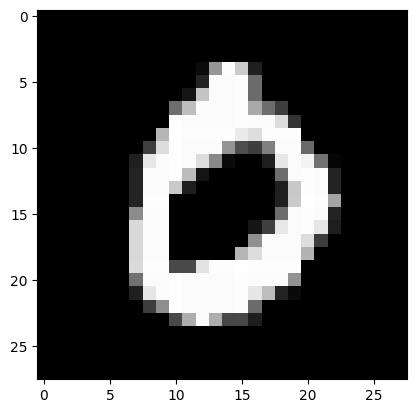

tensor(0)


In [32]:
import matplotlib.pyplot as plt
model.eval()
data, target = test_data[3]
output = model(data)
prediction = output.argmax(dim=1, keepdim=True)
print(f'Prediction: {prediction.item()}, Actual: {target}')
plt.imshow(data.reshape(28, 28), cmap='gray')
plt.show()
print(output.argmax())